In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\18. Forecasting\Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [2]:
import math

data['log_Passengers'] = data['Passengers']
data['log_Passengers'] = data['log_Passengers'] .astype('float64')

for i in range(0,96):
    data['log_Passengers'][i] = math.log(data['log_Passengers'][i],10)
    
data['log_Passengers']

0     2.049218
1     2.071882
2     2.120574
3     2.110590
4     2.082785
        ...   
91    2.607455
92    2.550228
93    2.485721
94    2.432969
95    2.485721
Name: log_Passengers, Length: 96, dtype: float64

In [3]:
t = pd.DataFrame(pd.Series(range(1,97)), columns = ['t'])
t

,t
0,1
1,2
2,3
3,4
4,5
...,...
91,92
92,93
93,94
94,95


In [4]:
data = pd.concat([data,t],axis=1)
data

,Month,Passengers,log_Passengers,t
0,1995-01-01,112,2.049218,1
1,1995-02-01,118,2.071882,2
2,1995-03-01,132,2.120574,3
3,1995-04-01,129,2.110590,4
4,1995-05-01,121,2.082785,5
...,...,...,...,...
91,2002-08-01,405,2.607455,92
92,2002-09-01,355,2.550228,93
93,2002-10-01,306,2.485721,94
94,2002-11-01,271,2.432969,95


In [5]:
data['t_sq'] = data['t']

for i in range(0,96):
    data['t_sq'][i] = data['t'][i]**2

In [6]:
data

,Month,Passengers,log_Passengers,t,t_sq
0,1995-01-01,112,2.049218,1,1
1,1995-02-01,118,2.071882,2,4
2,1995-03-01,132,2.120574,3,9
3,1995-04-01,129,2.110590,4,16
4,1995-05-01,121,2.082785,5,25
...,...,...,...,...,...
91,2002-08-01,405,2.607455,92,8464
92,2002-09-01,355,2.550228,93,8649
93,2002-10-01,306,2.485721,94,8836
94,2002-11-01,271,2.432969,95,9025


In [7]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction
data

,Month,Passengers,log_Passengers,t,t_sq,Date,month,year
0,1995-01-01,112,2.049218,1,1,1995-01-01,Jan,1995
1,1995-02-01,118,2.071882,2,4,1995-02-01,Feb,1995
2,1995-03-01,132,2.120574,3,9,1995-03-01,Mar,1995
3,1995-04-01,129,2.110590,4,16,1995-04-01,Apr,1995
4,1995-05-01,121,2.082785,5,25,1995-05-01,May,1995
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2.607455,92,8464,2002-08-01,Aug,2002
92,2002-09-01,355,2.550228,93,8649,2002-09-01,Sep,2002
93,2002-10-01,306,2.485721,94,8836,2002-10-01,Oct,2002
94,2002-11-01,271,2.432969,95,9025,2002-11-01,Nov,2002


In [8]:
s = pd.get_dummies(data["month"])
data = pd.concat([data,s],axis=1)
data

,Month,Passengers,log_Passengers,t,t_sq,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,2.049218,1,1,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2.071882,2,4,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,2.120574,3,9,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,2.110590,4,16,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,2.082785,5,25,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2.607455,92,8464,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2.550228,93,8649,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2.485721,94,8836,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2.432969,95,9025,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

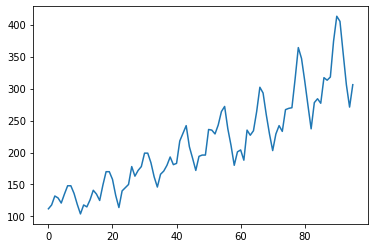

In [9]:
data.Passengers.plot()

<AxesSubplot:xlabel='month', ylabel='year'>

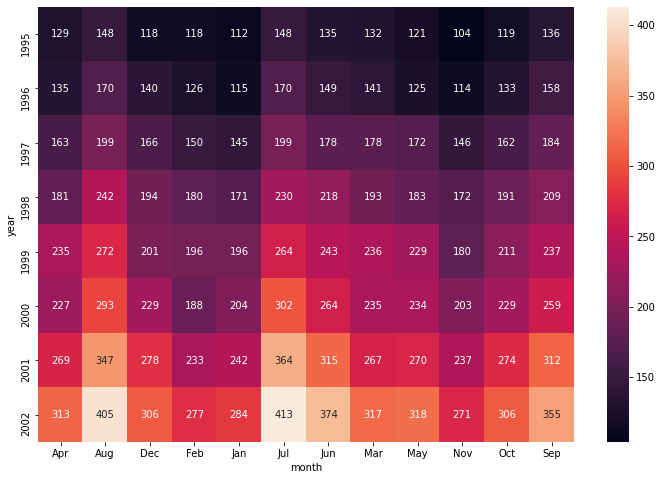

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

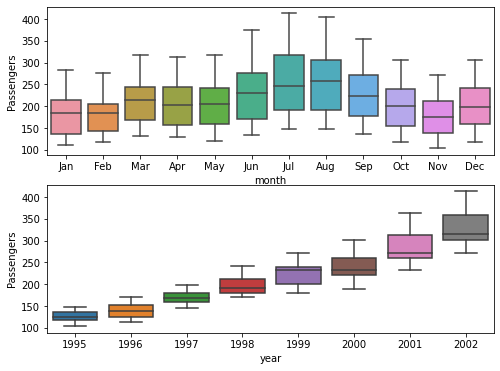

In [11]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

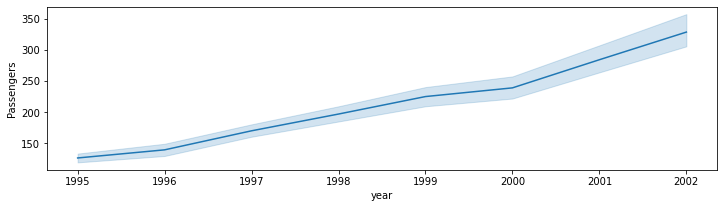

In [12]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)

In [13]:
Train = data.head(80)
Test = data.tail(16)

In [14]:
#Linear Model
import numpy as np
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.54262406772677

In [15]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

306.4686508764276

In [16]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584205

In [17]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443304

In [18]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.91098357010656

In [19]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

309.05939257781307

In [20]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

306.5526962588497

In [21]:
#Compare the results 

data = {"MODEL":\
        pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),\
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
1,rmse_Exp,306.468651
6,rmse_Mult_add_sea,306.552696
5,rmse_Mult_sea,309.059393
